## Shopify Fall 2022 Data Science Intern Challenge

#### Yamato Tadokoro
#### 5/16/2022

### Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'figure.figsize':(15,6)})
plt.rcParams.update({'font.size':18})

In [2]:
df = pd.read_csv('Data Set.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [3]:
df.shape

(5000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
# number of unique sneaker shops
len(df.shop_id.unique())

100

### We will take a look at the basic statistical report for the `order_amount` column.

In [8]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

/Users/yamato0615/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


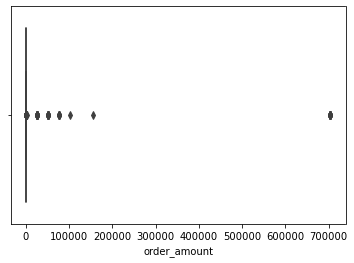

In [11]:
sns.boxplot(df.order_amount)
plt.show()

- can see that there are outliers in the data set that impacted the average to be higher than expected.
- looking by orders by shop_id's, we can see which shops are causing this

In [15]:
df.groupby(df.shop_id).order_amount.mean().nlargest(10)  

shop_id
42    235101.490196
78     49213.043478
50       403.545455
90       403.224490
38       390.857143
81       384.000000
6        383.508475
89       379.147541
33       376.275000
51       361.804348
Name: order_amount, dtype: float64

- by looking at the top 10 shops by AOV, we can see that shop number 42 and 78 are causing the overall mean to increase.

- There are there better ways to evaluate this data
1. Understand that this AOV is measured at an `aggregated level`, so simply taking the average of each of the oreder_amount value is not appropriate. Look for a better metric other than the average.
2. Take away the outliers and calculate the AOV.
3. Calculate the average price per item that the customer bought, rather than taking the AOV. 

### What metric would you report for this dataset?

#### Calculating the median approach

/Users/yamato0615/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


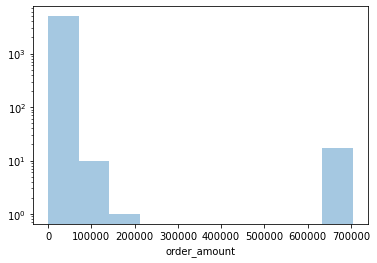

In [27]:
sns.distplot(df['order_amount'],bins=10, kde=False)
plt.yscale('log')

- by logging the count of order_amounts, we can see that there are quite a few order amounts that is over $100,000

#### Calculating the AOV without outliers approach

In [23]:
new_data = df[(df['shop_id'] != 42)&(df['shop_id'] != 78)]
new_data.shape

(4903, 7)

In [24]:
new_data.groupby(new_data.shop_id).order_amount.mean().nlargest(5)  

shop_id
50    403.545455
90    403.224490
38    390.857143
81    384.000000
6     383.508475
Name: order_amount, dtype: float64

In [25]:
new_data.order_amount.describe()

count    4903.000000
mean      300.155823
std       155.941112
min        90.000000
25%       163.000000
50%       284.000000
75%       386.500000
max      1086.000000
Name: order_amount, dtype: float64

#### Calculating the average price per item approach